In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import datetime
from datetime import timedelta
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori
import warnings
from scipy import stats
from sklearn import preprocessing, metrics, svm
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
pd.set_option('display.min_rows', 30)
pd.set_option('display.max_rows',150)
pd.set_option('display.width', 1000)

# Useful classes to have easier access to data features
class ColumnsInput:
    barcode = 'ddc_barcode'
    ipcode = 'ddc_ipcode'
    machine = 'ddc_mch_code'
    machine_side = 'ddc_mch_side'
    event = 'ddc_ev_subcode'
    time = 'ddc_ev_timestamp'
    
    
class ColumnsOutput:
    c_machine = 'c_machine' 
    event_delta_time = 'event_delta_time'
    day = 'y-m-day'
    month = 'month'

In [68]:
df = pd.read_csv('Data/preprocessed_data_2022.csv', low_memory=False)

In [70]:
#machines names
# machines = df[ColumnsInput.machine].unique()
# df_per_day = []
# days = []
# for day in df[ColumnsOutput.day].unique():
#     days.append(str(day))
#     df_per_day.append(df[df[ColumnsOutput.day] == day])
#     print(day, df[df[ColumnsOutput.day] == day].shape)
# for i in range(len(df_per_day)):
#     df_per_day[i] = df_per_day[i].groupby([ColumnsInput.machine])[ColumnsInput.barcode].nunique()
#     df_per_day[i] = df_per_day[i].reset_index()
#     count = 0
#     tmp = []
#     for mach in machines:
#         if mach not in df_per_day[i][ColumnsInput.machine].unique():
#             count += 1
#             tmp.append({ColumnsInput.machine: mach, ColumnsInput.barcode: 0})
#     df_per_day[i] = pd.concat([df_per_day[i], pd.DataFrame(tmp)], ignore_index=True)
#     df_per_day[i].sort_values(by=[ColumnsInput.machine], inplace=True)

#     print(df_per_day[i].shape)
    

     ddc_mch_code   y-m-day  ddc_barcode
0            1201  22-10-10           72
1            1201  22-10-11           69
2            1201  22-10-12           70
3            1201  22-10-13           99
4            1201  22-10-14           68
5            1201  22-10-15           68
6            1201  22-10-16           39
7            1201  22-10-17          104
8            1201  22-10-18           58
9            1201  22-10-19           37
10           1201  22-10-20            5
11           1201  22-10-21           53
12           1201  22-10-22          107
13           1201  22-10-23          110
14           1201  22-10-24           70
...           ...       ...          ...
4758         C612  22-11-27          100
4759         C612  22-11-28          138
4760         C612  22-11-29          160
4761         C612  22-11-30          126
4762         C612  22-12-10          120
4763         C612  22-12-11          144
4764         C612  22-12-12          176
4765         C61

<Axes: ylabel='Frequency'>

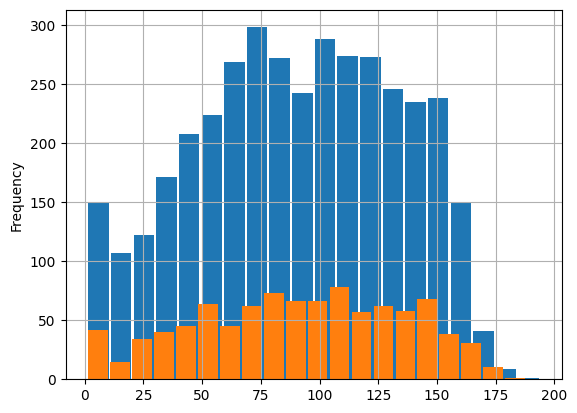

In [91]:
mach_day = df.groupby([ColumnsInput.machine, ColumnsOutput.day])[ColumnsInput.barcode].nunique().reset_index()
print(mach_day)
from sklearn.model_selection import train_test_split

train, test = train_test_split(mach_day, test_size=0.2)
train_s = pd.Series(train[ColumnsInput.barcode])
train_s.plot.hist(grid=True, bins=20, rwidth=0.9,)

test_s = pd.Series(test[ColumnsInput.barcode])
test_s.plot.hist(grid=True, bins=20, rwidth=0.9,)




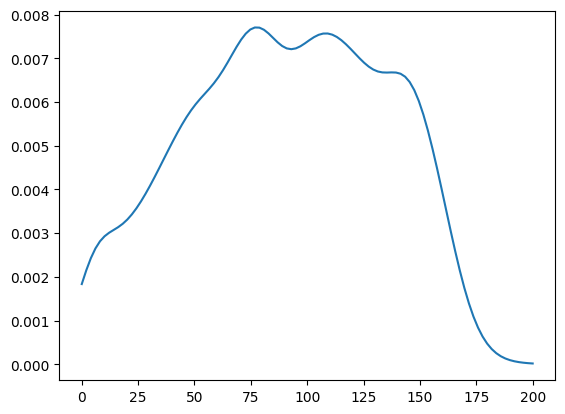

In [77]:
density = stats.gaussian_kde(train_s)
x = np.linspace(0, 200, 100)
y = density(x)
plt.plot(x, y)

In [88]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
log_regr = LogisticRegression(random_state=0).fit(train_s, y_transformed)
test_density = stats.gaussian_kde(test_s)
y_test = test_density(x)

log_regr.predict(s)

array([16, 19, 19, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 83, 76,
       77, 85, 90, 94, 89, 81, 71, 68, 63, 57, 57, 13, 13, 12, 12, 12,  5,
        5,  5,  5,  5,  5,  5,  5,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])